# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore', category=pd.errors.PerformanceWarning) # Surpass the warnings when running MC Simulation

In [2]:
# Load .env enviroment variables
load_dotenv("env.txt")


True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url)
btc_data = btc_response.json()
btc_price = btc_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_response = requests.get(eth_url)
eth_data = eth_response.json()
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crypto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $34473.60
The current value of your 5.3 ETH is $8310.35


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
alpaca_api_key,
alpaca_secret_key,
api_version="v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2023-10-17", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
my_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start=today,
    end=today
).df

# Displaying Portfolio 
my_portfolio.head()
# Reorganize the DataFrame
# Separate ticker data
AGG = my_portfolio[my_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = my_portfolio[my_portfolio['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
my_portfolio= pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Set index to date
my_portfolio.index = my_portfolio.index.date
# Preview DataFrame
my_portfolio.head()

AGG                                                         \
            close     high    low trade_count   open   volume       vwap   
2023-10-17  92.45  92.6873  92.35       27327  92.51  8225873  92.502855   

               SPY                                                            
             close    high     low trade_count    open    volume        vwap  
2023-10-17  436.02  438.14  432.45      579314  432.81  75324710  435.388283

In [9]:
# Pick AGG and SPY close prices
my_portfolio_closing = pd.DataFrame()
agg_close_price = float(my_portfolio["AGG"]["close"])
spy_close_price = float(my_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $92.45
Current SPY closing price: $436.02


/var/folders/cp/yd9whbw50ng6k5r1tb2hs4t00000gq/T/ipykernel_7121/521650813.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  agg_close_price = float(my_portfolio["AGG"]["close"])
/var/folders/cp/yd9whbw50ng6k5r1tb2hs4t00000gq/T/ipykernel_7121/521650813.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  spy_close_price = float(my_portfolio["SPY"]["close"])


In [10]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21801.00
The current value of your 200 AGG shares is $18490.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_crypto = my_btc_value + my_eth_value
total_shares = my_agg_value + my_spy_value

# Create savings DataFrame
df_savings = pd.DataFrame({
    "amount": [total_crypto,total_shares]}, index = ["Crypto", "Shares"]) 

# Display savings DataFrame
display(df_savings)

,amount
Crypto,42783.947
Shares,40291.000


<Axes: title={'center': 'Assets Savings'}, ylabel='amount'>

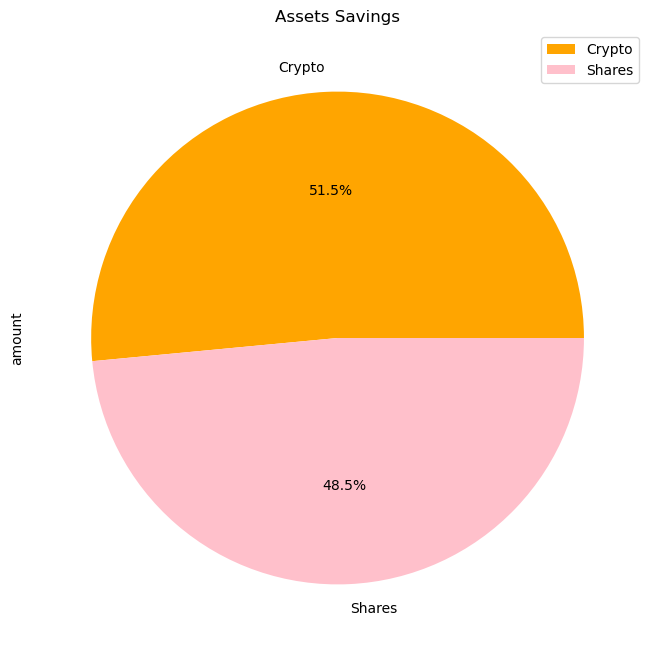

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y = "amount", title= "Assets Savings", colors = ('orange','pink'), figsize = (15,8), autopct='%1.1f%%')


In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['amount'].sum()

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your financial goal")
else:
    print(f"You are ${(emergency_fund - total_savings):0.2f} away from reaching your financial goal")

Congratulations! You have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-10-17', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-10-17', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
timeframe = "1Day"
tickers = ["SPY","AGG"]

df_ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame

SPY = df_ticker[df_ticker["symbol"]=="SPY"].drop("symbol", axis=1)
AGG = df_ticker[df_ticker["symbol"]=="AGG"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([SPY, AGG], axis=1, keys=["SPY","AGG"],)

# Display sample data
df_stock_data.index = df_stock_data.index.date
df_stock_data.head()

SPY                                                 \
               close    high     low trade_count    open     volume   
2018-10-17  280.4200  281.15  277.56      566703  280.44  111897958   
2018-10-18  276.3900  280.07  274.97      747569  279.40  137804219   
2018-10-19  276.1797  279.30  275.47      582243  277.13  140662678   
2018-10-22  275.0300  277.36  274.41      449535  277.00   83420677   
2018-10-23  273.5200  274.87  268.61      837023  270.95  148031789   

                           AGG                                         \
                  vwap   close      high      low trade_count    open   
2018-10-17  279.897689  104.53  104.7700  104.520       13135  104.71   
2018-10-18  277.099534  104.46  104.6195  104.375       13495  104.39   
2018-10-19  277.063759  104.37  104.5500  104.340       13175  104.47   
2018-10-22  275.565255  104.35  104.5200  104.340       11391  104.47   
2018-10-23  271.959702  104.48  104.7400  104.475       14144  104.67   

                                 
             volume        vwap  
2018-10-17  3011206  104.638046  
2018-10-18  3550735  104.496375  
2018-10-19  3105921  104.390878  
2018-10-22  2948119  104.408492  
2018-10-23  3695313  104.605860

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.40,0.60],
    num_simulation = 500,
    num_trading_days = 252*30
)


In [17]:
# Printing the simulation input data
MC_thirty.portfolio_data.head()

SPY                                                 \
               close    high     low trade_count    open     volume   
2018-10-17  280.4200  281.15  277.56      566703  280.44  111897958   
2018-10-18  276.3900  280.07  274.97      747569  279.40  137804219   
2018-10-19  276.1797  279.30  275.47      582243  277.13  140662678   
2018-10-22  275.0300  277.36  274.41      449535  277.00   83420677   
2018-10-23  273.5200  274.87  268.61      837023  270.95  148031789   

                                        AGG                                 \
                  vwap daily_return   close      high      low trade_count   
2018-10-17  279.897689          NaN  104.53  104.7700  104.520       13135   
2018-10-18  277.099534    -0.014371  104.46  104.6195  104.375       13495   
2018-10-19  277.063759    -0.000761  104.37  104.5500  104.340       13175   
2018-10-22  275.565255    -0.004163  104.35  104.5200  104.340       11391   
2018-10-23  271.959702    -0.005490  104.48  104.7400  104.475       14144   

                                                      
              open   volume        vwap daily_return  
2018-10-17  104.71  3011206  104.638046          NaN  
2018-10-18  104.39  3550735  104.496375    -0.000670  
2018-10-19  104.47  3105921  104.390878    -0.000862  
2018-10-22  104.47  2948119  104.408492    -0.000192  
2018-10-23  104.67  3695313  104.605860     0.001246

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998452,1.004807,1.004759,0.995084,1.009876,0.988517,1.001054,0.996710,0.996892,1.006557,...,0.992759,0.998993,0.994183,1.000554,1.004233,1.006638,1.007135,0.999031,0.996406,0.995229
2,0.993862,1.006687,1.009166,0.996168,1.004909,1.002653,1.009102,0.999056,0.994007,1.011239,...,0.995167,0.994953,0.988955,0.998077,1.000755,1.005028,1.010568,0.988416,0.991089,0.990205
3,0.993535,1.000388,1.016508,1.002864,1.009909,0.999594,1.008054,1.005675,0.992444,1.014237,...,0.995803,1.002978,0.992431,1.003334,0.998284,1.002176,1.021308,0.988411,0.987712,0.986992
4,1.002075,0.995218,1.024428,0.995140,1.013632,1.004897,1.010046,1.008937,0.989928,1.007238,...,1.000924,0.992598,0.999864,1.011618,1.002054,1.006053,1.024159,0.987725,0.985155,0.983813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.633194,1.626153,1.943245,3.514852,1.460127,0.639788,2.742580,2.408039,1.250961,1.385536,...,1.266553,1.705981,3.725893,3.961648,1.979252,1.611244,1.047387,3.475720,3.608555,1.869856
7557,2.623138,1.623045,1.938933,3.501847,1.448648,0.638093,2.749127,2.394432,1.249129,1.393721,...,1.259008,1.714917,3.740596,3.958499,1.973510,1.634976,1.048051,3.493754,3.632951,1.876147
7558,2.653703,1.607724,1.942831,3.464080,1.438507,0.640410,2.746561,2.384660,1.254358,1.397831,...,1.254144,1.713704,3.717066,3.968376,1.965540,1.655071,1.051898,3.516508,3.644085,1.882062
7559,2.663234,1.623609,1.954751,3.469656,1.440090,0.642319,2.749316,2.408337,1.264982,1.400806,...,1.253330,1.708751,3.683955,3.971722,1.971901,1.654472,1.054096,3.510082,3.636203,1.852566


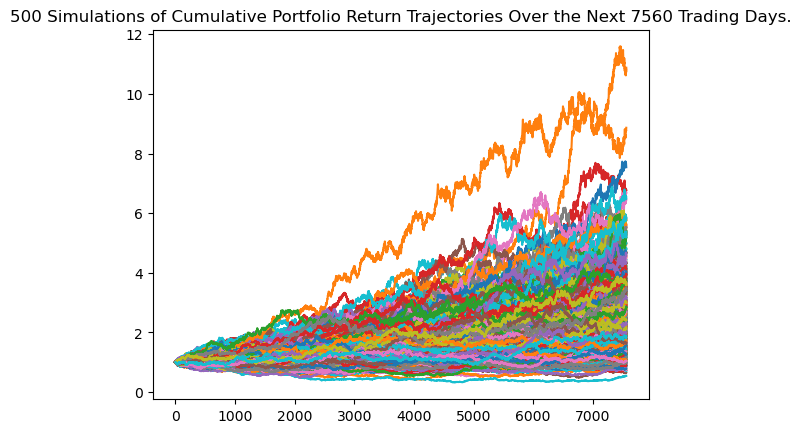

In [19]:
# Plot simulation outcomes
line_plot = MC_thirty.plot_simulation()

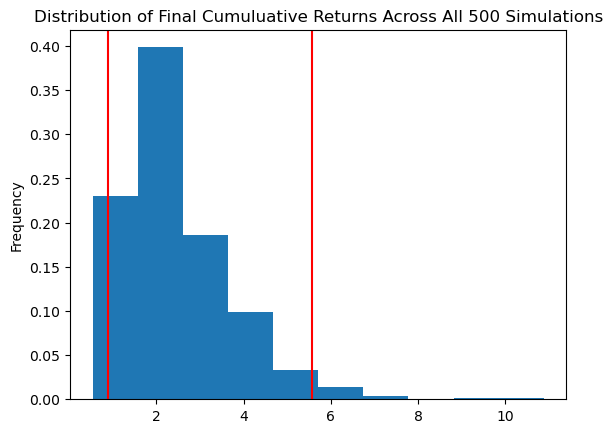

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_summary_stats = MC_thirty.summarize_cumulative_return()

# Print summary statistics
mc_summary_stats

count           500.000000
mean              2.468932
std               1.268912
min               0.541779
25%               1.603339
50%               2.158898
75%               3.064338
max              10.879608
95% CI Lower      0.886662
95% CI Upper      5.570262
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(mc_summary_stats[8]*initial_investment,2)
ci_upper = round(mc_summary_stats[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $17733.23 and $111405.25


/var/folders/cp/yd9whbw50ng6k5r1tb2hs4t00000gq/T/ipykernel_7121/707975399.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_lower = round(mc_summary_stats[8]*initial_investment,2)
/var/folders/cp/yd9whbw50ng6k5r1tb2hs4t00000gq/T/ipykernel_7121/707975399.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_upper = round(mc_summary_stats[9]*initial_investment,2)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(mc_summary_stats[8]*initial_investment,2)
ci_upper = round(mc_summary_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $26599.85 and $167107.87


/var/folders/cp/yd9whbw50ng6k5r1tb2hs4t00000gq/T/ipykernel_7121/3209849107.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_lower = round(mc_summary_stats[8]*initial_investment,2)
/var/folders/cp/yd9whbw50ng6k5r1tb2hs4t00000gq/T/ipykernel_7121/3209849107.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_upper = round(mc_summary_stats[9]*initial_investment,2)


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
higher_risk_weights = [0.85,0.15]

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_higher_risk = MCSimulation(
    portfolio_data = df_stock_data,
    weights = higher_risk_weights,
    num_simulation = 500,
    num_trading_days = 252*5 
)
MC_higher_risk.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.982683,0.992573,0.986876,0.998821,1.000248,1.007345,0.992052,0.975470,1.002990,1.010942,...,1.006323,1.005753,0.990370,1.001125,1.008352,1.010005,1.009930,0.979733,1.006532,0.988229
2,0.987281,0.975485,0.989787,1.017159,1.009986,1.019974,0.986068,0.971669,1.010259,0.999209,...,1.010226,0.979409,0.981866,1.017033,1.005913,1.026798,0.992577,0.981069,1.014037,0.975304
3,0.981745,0.950284,0.973820,0.996745,1.010312,0.986359,0.987109,0.982928,1.002839,1.010526,...,1.004203,0.986848,0.992314,1.009632,0.994692,1.024468,0.984421,0.999591,1.042227,0.951607
4,0.967484,0.956370,0.984032,1.001974,0.994861,0.999541,0.987761,0.994050,1.001777,1.029833,...,1.009690,0.992525,0.976616,1.033092,0.975405,1.030039,0.967983,0.980876,1.050998,0.944208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.903206,2.348180,1.054860,1.431826,1.651373,3.799223,1.034316,1.545971,2.821290,1.664762,...,1.051920,1.602982,1.988084,1.299050,2.572223,0.930769,2.161403,1.308471,1.323118,1.794876
1257,1.895967,2.377925,1.042640,1.425257,1.669603,3.874602,1.028062,1.535560,2.864040,1.629054,...,1.056210,1.599511,2.023260,1.323562,2.594695,0.917347,2.160743,1.319328,1.313062,1.786729
1258,1.892855,2.375986,1.047024,1.436470,1.657955,3.899085,1.038998,1.533194,2.801646,1.602141,...,1.049264,1.569924,2.026069,1.333602,2.591954,0.930207,2.181061,1.356568,1.320981,1.795757
1259,1.890922,2.377584,1.058877,1.422650,1.650642,3.881122,1.019729,1.556738,2.777375,1.615091,...,1.066422,1.544666,2.039865,1.349391,2.616893,0.922982,2.174916,1.375569,1.313171,1.761440


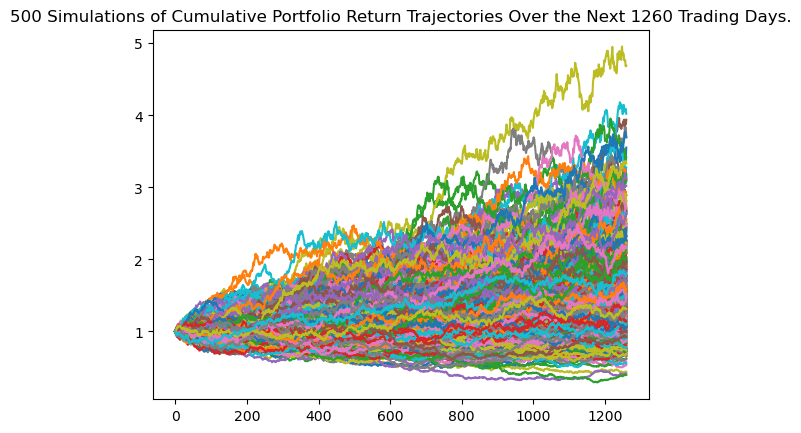

In [26]:
# Plot simulation outcomes
higher_plot = MC_higher_risk.plot_simulation()

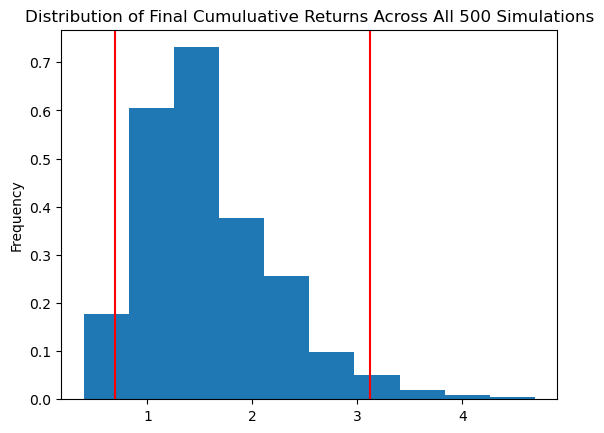

In [27]:
# Plot probability distribution and confidence intervals
higher_prob_plot = MC_higher_risk.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_higher_summary = MC_higher_risk.summarize_cumulative_return()

# Print summary statistics
mc_higher_summary

count           500.000000
mean              1.573107
std               0.632981
min               0.395707
25%               1.148701
50%               1.437619
75%               1.924377
max               4.689566
95% CI Lower      0.690463
95% CI Upper      3.123039
Name: 1260, dtype: float64

In [29]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(mc_higher_summary[8]*initial_investment,2)
ci_upper_five = round(mc_higher_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $41427.8 and $187382.33


/var/folders/cp/yd9whbw50ng6k5r1tb2hs4t00000gq/T/ipykernel_7121/3956754330.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_lower_five = round(mc_higher_summary[8]*initial_investment,2)
/var/folders/cp/yd9whbw50ng6k5r1tb2hs4t00000gq/T/ipykernel_7121/3956754330.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_upper_five = round(mc_higher_summary[9]*initial_investment,2)


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_higher_risk_10 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = higher_risk_weights,
    num_simulation = 500,
    num_trading_days = 252*10 
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_higher_risk_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006999,1.023109,1.010322,1.001157,1.004636,1.001775,0.990283,0.984399,0.998902,0.999311,...,0.985480,0.999695,0.980307,1.016787,0.988846,1.007271,1.010808,1.001275,0.999437,1.003611
2,1.013055,1.013952,1.004578,1.000542,0.998026,0.997467,1.005179,0.990356,0.976331,1.011193,...,0.973385,0.991845,0.975274,1.040336,0.994826,0.982151,1.024516,0.977603,0.993664,1.014190
3,0.992671,1.011325,1.018823,1.001012,0.989440,1.010082,1.011037,0.978207,0.992488,1.015031,...,0.986642,0.989140,0.966154,1.045075,0.996279,0.982218,1.020313,0.992646,0.991204,1.029509
4,0.992370,1.040574,1.018965,1.002185,1.009338,1.004487,1.013694,0.974261,0.994846,1.013828,...,0.965568,0.986401,0.986127,1.051182,0.969692,0.964034,1.010347,0.981474,0.993330,1.017062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.019486,2.794339,6.526107,1.871249,0.646334,4.498078,2.179570,1.623329,1.280545,1.297844,...,4.515934,1.419036,2.046239,1.420551,1.775655,1.270696,1.224797,2.835705,1.369291,1.999254
2517,1.029781,2.760295,6.517174,1.860937,0.656576,4.443841,2.199191,1.626689,1.284468,1.312243,...,4.518893,1.446000,2.041821,1.422890,1.780967,1.306482,1.204642,2.833704,1.384317,1.945798
2518,1.035018,2.783922,6.575639,1.852848,0.648771,4.467218,2.222163,1.606426,1.281928,1.315703,...,4.588870,1.451898,2.036668,1.408017,1.800706,1.279999,1.201871,2.818065,1.401130,1.958253
2519,1.040469,2.784210,6.526675,1.797608,0.641669,4.480293,2.227769,1.622701,1.289753,1.303105,...,4.578976,1.442334,2.082100,1.406068,1.798769,1.298452,1.180767,2.869148,1.378438,1.956611


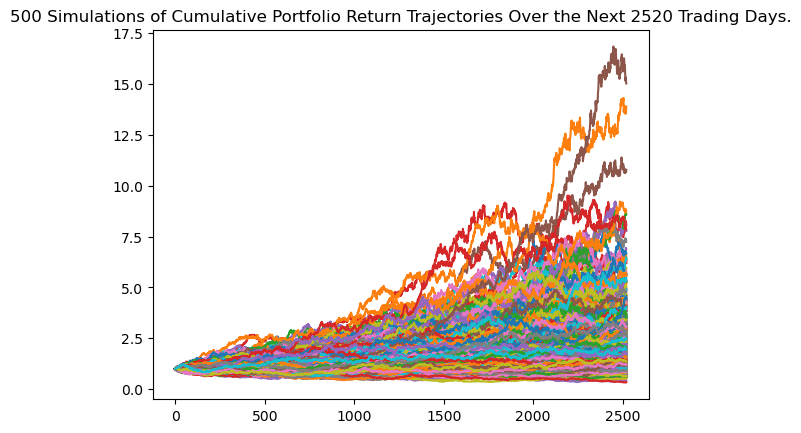

In [32]:
# Plot simulation outcomes
higher_plot_10 = MC_higher_risk_10.plot_simulation()

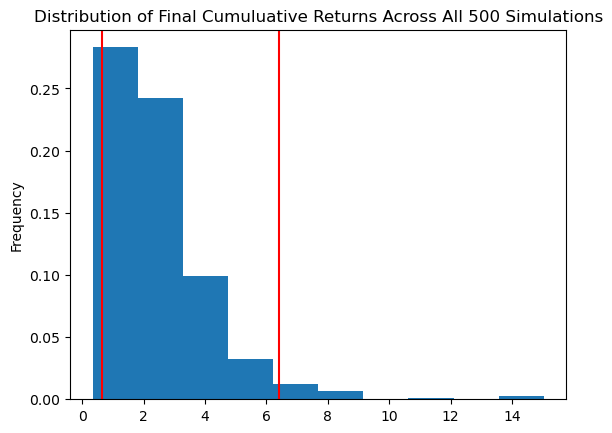

In [33]:
# Plot probability distribution and confidence intervals
higher_prob_plot_10 = MC_higher_risk_10.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_higher_summary_10 = MC_higher_risk_10.summarize_cumulative_return()

# Print summary statistics
mc_higher_summary_10

count           500.000000
mean              2.514399
std               1.680229
min               0.341288
25%               1.417867
50%               2.092592
75%               3.129005
max              15.033190
95% CI Lower      0.640798
95% CI Upper      6.414879
Name: 2520, dtype: float64

In [35]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(mc_higher_summary_10[8]*initial_investment,2)
ci_upper_ten = round(mc_higher_summary_10[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $38447.87 and $384892.73


/var/folders/cp/yd9whbw50ng6k5r1tb2hs4t00000gq/T/ipykernel_7121/2544353450.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_lower_ten = round(mc_higher_summary_10[8]*initial_investment,2)
/var/folders/cp/yd9whbw50ng6k5r1tb2hs4t00000gq/T/ipykernel_7121/2544353450.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_upper_ten = round(mc_higher_summary_10[9]*initial_investment,2)


# 5-year investment with $60,000 initial investment:

* Range: $57,401.85 to $215,090.84

This portfolio has a significant range of potential outcomes,
indicating higher volatility or risk. The lower end of the range is close to the initial investment,
suggesting a scenario where you might not earn much return. However,
the upper range shows the potential to more than triple the initial investment.
This might be suitable for an investor looking for higher potential returns and willing to accept higher risk.
10-year investment with $60,000 initial investment:

# 10-year investment with $60,000 initial investment:

* Range: $76,060.58 to $547,396.24

This scenario suggests a higher minimum return compared to the 5-year investment
but also offers a much higher potential maximum return.
The longer-term allows for potential recovery from market downturns and benefits from the compounding of returns. 
This might appeal to someone who has a longer investment horizon
and is looking for significant growth while being able to withstand market volatility.
30-year investment with $30,000 initial investment:

# 30-year investment with $30,000 initial investment:

* Range: $86,265.52 to $469,859.36

Despite the initial investment being half that of the other scenarios,
this portfolio shows substantial growth over the long term,
demonstrating the power of compounded returns over time.
The minimum return is almost triple the initial investment,
indicating a relatively lower risk.
This would be ideal for an investor with a very long horizon,
emphasizing security and steady growth, perhaps for retirement planning.